<a href="https://colab.research.google.com/github/selfor21/NN-Models/blob/main/01_MLP_linear_activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEURAL NETWORK

## MLP with different activaction function


- Carregamento dos pacotes necessários
- Carregamento dos dados (MNIST)
- Desenvolvimento de um modelo MLP


# 1\. Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
import keras.datasets as kds

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

print(tf.__version__)

2.12.0


In [ ]:
test_loss_l = []
test_acc_l = []
activation_l = []
history_l = []

# 2\. Dataset MINIST

### Public Dataset with 70000 examples (60K Train / 10K Test)

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png">

Ver: http://yann.lecun.com/exdb/mnist/

## Data load and preparation

In [ ]:
input_shape = (28, 28, 1)

# Keras.datasets
(x_train, y_train), (x_test, y_test) = kds.mnist.load_data()

# Features Normalization
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot-encoding class convertion
num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


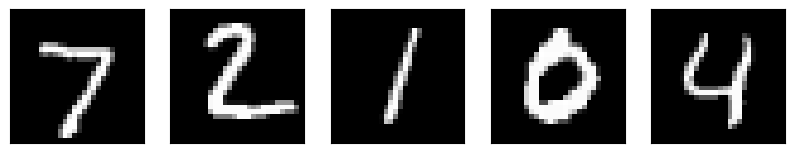

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3\. Modelos

## 3.1\. - MLP - 'softmax' activation

In [ ]:
# Linear Model Linear (without hidden rows)
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Flatten(input_shape=input_shape))
modelo1.add(keras.layers.Dense(units=10, activation="softmax"))

modelo1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


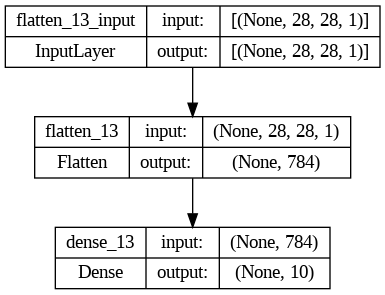

In [ ]:
#Network Graph
tf.keras.utils.plot_model(modelo1, show_shapes=True)

In [ ]:
modelo1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#training
history = modelo1.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.9529 - accuracy: 0.7673 - val_loss: 0.5162 - val_accuracy: 0.8772 - 1s/epoch - 7ms/step
Epoch 2/30
188/188 - 1s - loss: 0.4738 - accuracy: 0.8806 - val_loss: 0.3925 - val_accuracy: 0.8995 - 606ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.3918 - accuracy: 0.8969 - val_loss: 0.3481 - val_accuracy: 0.9070 - 618ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.3547 - accuracy: 0.9050 - val_loss: 0.3240 - val_accuracy: 0.9137 - 622ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.3321 - accuracy: 0.9090 - val_loss: 0.3098 - val_accuracy: 0.9163 - 567ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.3174 - accuracy: 0.9128 - val_loss: 0.2992 - val_accuracy: 0.9176 - 672ms/epoch - 4ms/step
Epoch 7/30
188/188 - 2s - loss: 0.3065 - accuracy: 0.9152 - val_loss: 0.2909 - val_accuracy: 0.9198 - 2s/epoch - 11ms/step
Epoch 8/30
188/188 - 2s - loss: 0.2983 - accuracy: 0.9175 - val_loss: 0.2858 - val_accuracy: 0.9218 - 2s/epoch - 9ms/step
Epoch 9/

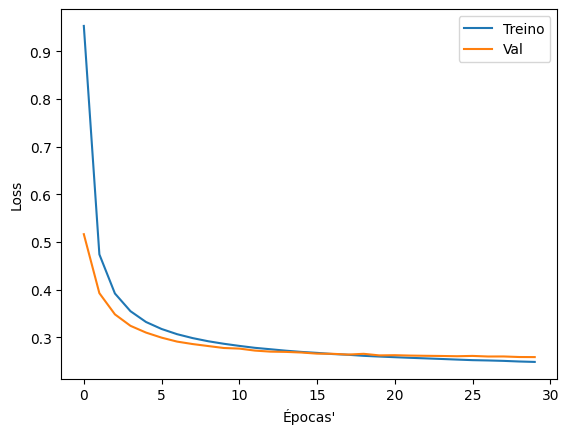

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [ ]:
# Model Avaliation with test data
print("Avaliação do modelo (Teste)")
results1 = modelo1.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results1)


Avaliação do modelo (Teste)
10/10 [==============================] - 0s 5ms/step - loss: 0.2637 - accuracy: 0.9273
Test loss, Test acc: [0.2637331187725067, 0.927299976348877]


In [ ]:
activation_l.append('softmax')
test_loss_l.append(results1[0])
test_acc_l.append(results1[1])

## 3.2\. - MLP - 'sigmoid' activation

In [ ]:
modelo12 = keras.Sequential()
modelo12.add(keras.layers.Flatten(input_shape=input_shape))
modelo12.add(keras.layers.Dense(units=10, activation="sigmoid"))


In [ ]:
modelo12.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#training
history = modelo12.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.9571 - accuracy: 0.7699 - val_loss: 0.5138 - val_accuracy: 0.8791 - 1s/epoch - 7ms/step
Epoch 2/30
188/188 - 1s - loss: 0.4716 - accuracy: 0.8807 - val_loss: 0.3914 - val_accuracy: 0.8997 - 595ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.3901 - accuracy: 0.8958 - val_loss: 0.3464 - val_accuracy: 0.9093 - 605ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.3531 - accuracy: 0.9041 - val_loss: 0.3237 - val_accuracy: 0.9123 - 586ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.3315 - accuracy: 0.9099 - val_loss: 0.3098 - val_accuracy: 0.9164 - 614ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.3168 - accuracy: 0.9129 - val_loss: 0.2982 - val_accuracy: 0.9187 - 610ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.3060 - accuracy: 0.9161 - val_loss: 0.2919 - val_accuracy: 0.9182 - 583ms/epoch - 3ms/step
Epoch 8/30
188/188 - 1s - loss: 0.2981 - accuracy: 0.9179 - val_loss: 0.2860 - val_accuracy: 0.9212 - 603ms/epoch - 3ms/step
Epo

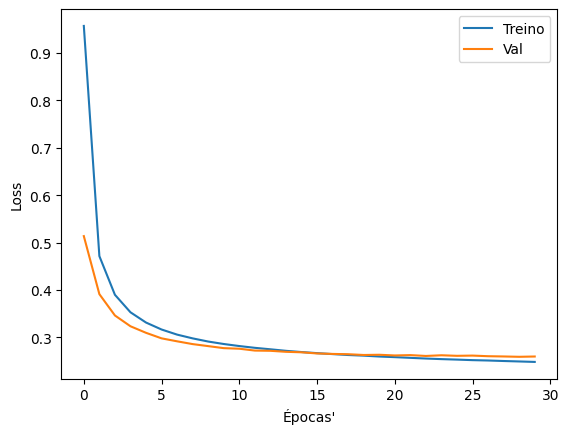

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [ ]:
# Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results12 = modelo12.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results12)

Avaliação do modelo (Teste)
10/10 [==============================] - 0s 4ms/step - loss: 0.2647 - accuracy: 0.9258
Test loss, Test acc: [0.2646971642971039, 0.9258000254631042]


In [ ]:
activation_l.append('sigmoid')
test_loss_l.append(results12[0])
test_acc_l.append(results12[1])

## 3.3\. - MLP - 'softplus' activation

In [ ]:
modelo13 = keras.Sequential()
modelo13.add(keras.layers.Flatten(input_shape=input_shape))
modelo13.add(keras.layers.Dense(units=10, activation="softplus"))

modelo13.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = modelo13.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)


Epoch 1/30
188/188 - 2s - loss: 1.0819 - accuracy: 0.7481 - val_loss: 0.5668 - val_accuracy: 0.8759 - 2s/epoch - 10ms/step
Epoch 2/30
188/188 - 1s - loss: 0.5033 - accuracy: 0.8774 - val_loss: 0.4122 - val_accuracy: 0.8976 - 565ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.4060 - accuracy: 0.8944 - val_loss: 0.3585 - val_accuracy: 0.9085 - 585ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.3633 - accuracy: 0.9034 - val_loss: 0.3315 - val_accuracy: 0.9119 - 547ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.3387 - accuracy: 0.9083 - val_loss: 0.3129 - val_accuracy: 0.9154 - 1s/epoch - 5ms/step
Epoch 6/30
188/188 - 1s - loss: 0.3218 - accuracy: 0.9126 - val_loss: 0.3038 - val_accuracy: 0.9164 - 680ms/epoch - 4ms/step
Epoch 7/30
188/188 - 1s - loss: 0.3103 - accuracy: 0.9147 - val_loss: 0.2940 - val_accuracy: 0.9200 - 624ms/epoch - 3ms/step
Epoch 8/30
188/188 - 1s - loss: 0.3013 - accuracy: 0.9172 - val_loss: 0.2872 - val_accuracy: 0.9214 - 640ms/epoch - 3ms/step
Epoch

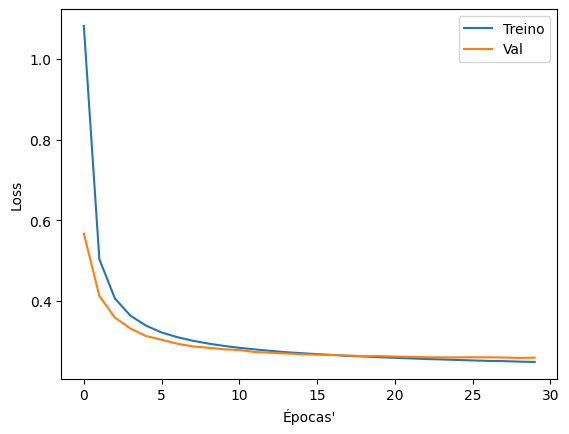

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [ ]:
# Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results13 = modelo13.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results13)

Avaliação do modelo (Teste)
10/10 [==============================] - 0s 4ms/step - loss: 0.2639 - accuracy: 0.9271
Test loss, Test acc: [0.26389649510383606, 0.9271000027656555]


In [ ]:
activation_l.append('softplus')
test_loss_l.append(results13[0])
test_acc_l.append(results13[1])

## 3.4\. - MLP - 'relu' activation

In [ ]:
modelo14 = keras.Sequential()
modelo14.add(keras.layers.Flatten(input_shape=input_shape))
modelo14.add(keras.layers.Dense(units=10, activation="relu"))

modelo14.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = modelo13.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.2479 - accuracy: 0.9312 - val_loss: 0.2588 - val_accuracy: 0.9308 - 724ms/epoch - 4ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2469 - accuracy: 0.9315 - val_loss: 0.2593 - val_accuracy: 0.9307 - 580ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2462 - accuracy: 0.9312 - val_loss: 0.2590 - val_accuracy: 0.9304 - 632ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.2458 - accuracy: 0.9319 - val_loss: 0.2584 - val_accuracy: 0.9319 - 576ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.2448 - accuracy: 0.9314 - val_loss: 0.2593 - val_accuracy: 0.9296 - 565ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.2443 - accuracy: 0.9323 - val_loss: 0.2595 - val_accuracy: 0.9301 - 565ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.2436 - accuracy: 0.9323 - val_loss: 0.2586 - val_accuracy: 0.9317 - 618ms/epoch - 3ms/step
Epoch 8/30
188/188 - 1s - loss: 0.2430 - accuracy: 0.9326 - val_loss: 0.2579 - val_accuracy: 0.9314 - 566ms/epoch - 3ms/step


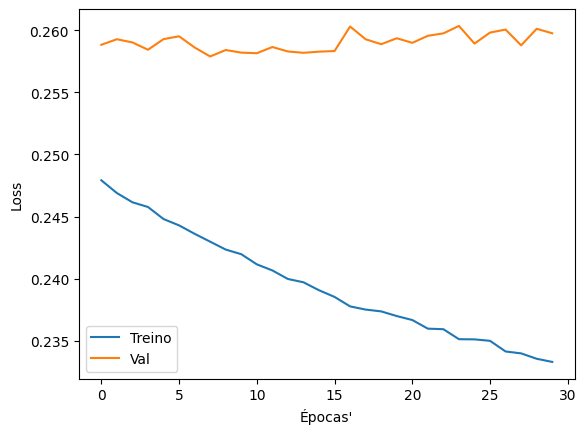

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [ ]:
# Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results14 = modelo14.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results14)

Avaliação do modelo (Teste)
10/10 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0950
Test loss, Test acc: [nan, 0.0949999988079071]


In [ ]:
activation_l.append('relu')
test_loss_l.append(results14[0])
test_acc_l.append(results14[1])

## 3.5\. - MLP - 'softsign' activation

In [ ]:
modelo15 = keras.Sequential()
modelo15.add(keras.layers.Flatten(input_shape=input_shape))
modelo15.add(keras.layers.Dense(units=10, activation="softsign"))

modelo15.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = modelo13.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.2329 - accuracy: 0.9355 - val_loss: 0.2589 - val_accuracy: 0.9320 - 713ms/epoch - 4ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2324 - accuracy: 0.9352 - val_loss: 0.2591 - val_accuracy: 0.9321 - 637ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2324 - accuracy: 0.9355 - val_loss: 0.2593 - val_accuracy: 0.9317 - 618ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.2320 - accuracy: 0.9354 - val_loss: 0.2601 - val_accuracy: 0.9307 - 570ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.2317 - accuracy: 0.9357 - val_loss: 0.2605 - val_accuracy: 0.9308 - 638ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.2315 - accuracy: 0.9364 - val_loss: 0.2614 - val_accuracy: 0.9310 - 624ms/epoch - 3ms/step
Epoch 7/30
188/188 - 1s - loss: 0.2311 - accuracy: 0.9360 - val_loss: 0.2602 - val_accuracy: 0.9317 - 854ms/epoch - 5ms/step
Epoch 8/30
188/188 - 1s - loss: 0.2309 - accuracy: 0.9368 - val_loss: 0.2598 - val_accuracy: 0.9312 - 907ms/epoch - 5ms/step


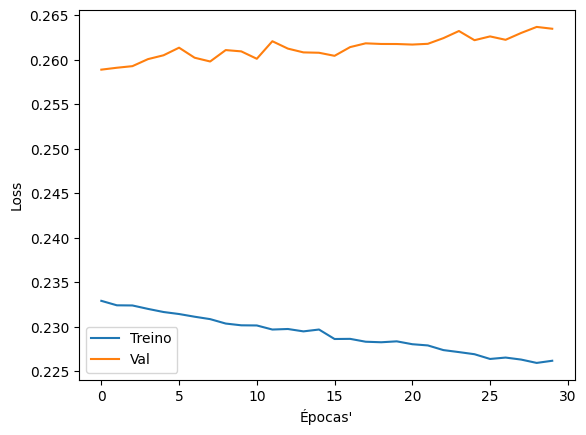

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [ ]:
# Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results15 = modelo15.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results15)

Avaliação do modelo (Teste)
10/10 [==============================] - 0s 3ms/step - loss: 6.6574 - accuracy: 0.0983
Test loss, Test acc: [6.657390594482422, 0.09830000251531601]


In [ ]:
activation_l.append('softsign')
test_loss_l.append(results15[0])
test_acc_l.append(results15[1])

## 3.6\. - MLP - 'tanh' activation

In [ ]:
modelo16 = keras.Sequential()
modelo16.add(keras.layers.Flatten(input_shape=input_shape))
modelo16.add(keras.layers.Dense(units=10, activation="tanh"))

modelo16.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = modelo13.fit(x_train, y_train, batch_size=256, epochs=30, validation_split=0.2, verbose=2)

Epoch 1/30
188/188 - 1s - loss: 0.2212 - accuracy: 0.9390 - val_loss: 0.2675 - val_accuracy: 0.9305 - 642ms/epoch - 3ms/step
Epoch 2/30
188/188 - 1s - loss: 0.2214 - accuracy: 0.9384 - val_loss: 0.2683 - val_accuracy: 0.9312 - 588ms/epoch - 3ms/step
Epoch 3/30
188/188 - 1s - loss: 0.2211 - accuracy: 0.9386 - val_loss: 0.2662 - val_accuracy: 0.9312 - 562ms/epoch - 3ms/step
Epoch 4/30
188/188 - 1s - loss: 0.2208 - accuracy: 0.9392 - val_loss: 0.2672 - val_accuracy: 0.9304 - 636ms/epoch - 3ms/step
Epoch 5/30
188/188 - 1s - loss: 0.2211 - accuracy: 0.9388 - val_loss: 0.2679 - val_accuracy: 0.9303 - 613ms/epoch - 3ms/step
Epoch 6/30
188/188 - 1s - loss: 0.2205 - accuracy: 0.9390 - val_loss: 0.2676 - val_accuracy: 0.9297 - 912ms/epoch - 5ms/step
Epoch 7/30
188/188 - 1s - loss: 0.2207 - accuracy: 0.9392 - val_loss: 0.2681 - val_accuracy: 0.9308 - 847ms/epoch - 5ms/step
Epoch 8/30
188/188 - 1s - loss: 0.2202 - accuracy: 0.9393 - val_loss: 0.2689 - val_accuracy: 0.9305 - 720ms/epoch - 4ms/step


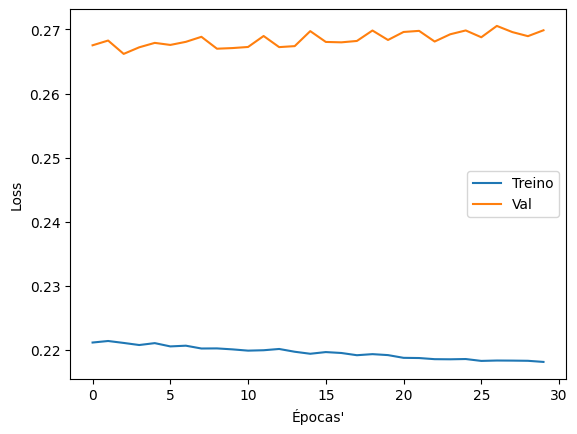

In [ ]:
plt.xlabel("Épocas'")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label="Treino")
plt.plot(history.history['val_loss'], label="Val")
plt.legend()
plt.show()

In [ ]:
# Avaliação do modelo treinado no conjunto de teste
print("Avaliação do modelo (Teste)")
results16 = modelo16.evaluate(x_test, y_test, batch_size=1000)
print("Test loss, Test acc:", results16)

Avaliação do modelo (Teste)
10/10 [==============================] - 0s 4ms/step - loss: 6.2998 - accuracy: 0.1151
Test loss, Test acc: [6.299829006195068, 0.11509999632835388]


In [ ]:
activation_l.append('tanh')
test_loss_l.append(results16[0])
test_acc_l.append(results16[1])

# 4\. Summary - Activation Function x test_loss and test_accuraty

In [ ]:
results1_df

,activation,test_loss,test_acc
0,softmax,0.263733,0.9273
1,tanh,6.292787,0.1255
2,softsign,6.657391,0.0983
3,relu,NaN,0.0950
4,sigmoid,0.264697,0.9258
5,softplus,0.263896,0.9271
6,tanh,6.299829,0.1151
